<a href="https://colab.research.google.com/github/ReemYounis123/GenAI-projects/blob/main/conditional_gan_for_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
np.random.seed(10)
random_dim = 100

In [ ]:
# Load the MNIST dataset and normalize each pixel value to 0-1 range.
def load_mnist():
  (x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
  x_train, x_test = (x_train-127.5)/127.5, (x_test-127.5)/127.5
  x_train = x_train.reshape((-1,28,28,1))
  x_test = x_test.reshape((-1,28,28,1))
  return (x_train, y_train, x_test, y_test)

In [ ]:
# Define a Generator
def define_generator(latent_dim):
  # takes 2 input: latent_vec and label
  # foundation of image
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(128*7*7, activation='relu', input_dim=latent_dim))
  model.add(tf.keras.layers.Reshape((7,7,128)))
  model.add(tf.keras.layers.UpSampling2D())
  model.add(tf.keras.layers.Conv2D(128,3,padding='same',activation='relu'))
  model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
  model.add(tf.keras.layers.UpSampling2D())
  model.add(tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'))
  model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
  model.add(tf.keras.layers.Conv2D(1,3,padding='same',activation='tanh'))

  # label encoding
  z = tf.keras.layers.Input(shape=(latent_dim,))
  label = tf.keras.layers.Input(shape=(1,),dtype='uint8')
  label_embed = tf.keras.layers.Embedding(10, latent_dim, input_length=1)(label)
  label_embed = tf.keras.layers.Flatten()(label_embed)
  combined = tf.keras.layers.multiply([z, label_embed])

  img = model(combined)

  return tf.keras.models.Model([z, label], img)

latent_dim = 100
g_model = define_generator(latent_dim)
g_model.summary()

In [ ]:
# create a discriminator network to differentiate between real and fake image
def define_discriminator():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(32,(3,3),2,input_shape=(28,28,2),padding='same'))
  model.add(tf.keras.layers.LeakyReLU(0.2))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(64,(3,3),2,padding='same'))
  model.add(tf.keras.layers.LeakyReLU(0.2))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  img = tf.keras.layers.Input(shape=(28, 28, 1))
  label = tf.keras.layers.Input(shape=(1,))
  label_embed = tf.keras.layers.Embedding(input_dim=10, output_dim=np.prod((28,28)), input_length=1)(label)
  label_embed = tf.keras.layers.Flatten()(label_embed)
  label_embed = tf.keras.layers.Reshape((28, 28, 1))(label_embed)
  concatenated = tf.keras.layers.Concatenate(axis=-1)([label_embed, img])
  prediction = model(concatenated)
  return tf.keras.models.Model([img, label], prediction)

d_model = define_discriminator()
d_model.summary()

In [ ]:
d_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
z = tf.keras.layers.Input(shape=(100,))
label = tf.keras.layers.Input(shape=(1,))
img = g_model([z, label])

d_model.trainable = False
prediction = d_model([img, label])
cgan = tf.keras.models.Model([z, label], prediction)
cgan.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cgan.summary()

In [ ]:
x_train, y_train, x_test, y_test = load_mnist()

In [ ]:
def plot_image(images, labels, rows, cols):
  w=10
  h=10
  fig=plt.figure(figsize=(8, 8))
  for i in range(1, cols*rows +1):
      img = images[i-1]
      ax = fig.add_subplot(rows, cols, i)
      ax.title.set_text(labels[i-1])
      plt.imshow(img.reshape((28,28)))
  fig.tight_layout()
  plt.show()

samples = x_train[:4*4]
labels = y_train[:4*4]
plot_image(samples,labels, 4,4)

(60000, 28, 28, 1)
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Losses(d,g): 0.7545504 [array(0.74210167, dtype=float32), array(0.74210167, dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


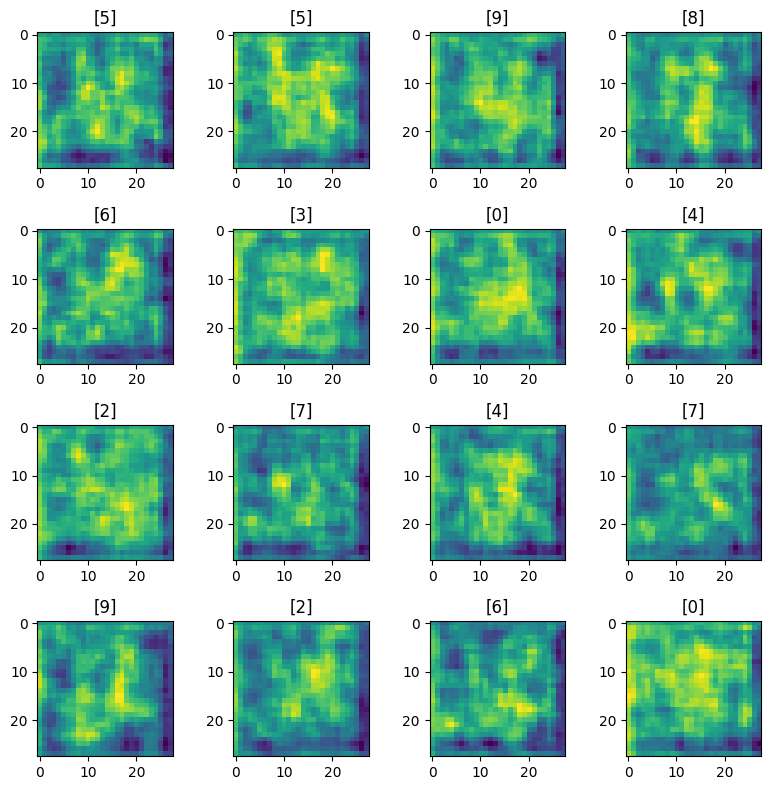

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━

In [ ]:
import os

epochs = 100
batch_size = 128
save_interval = 1000

print(x_train.shape)

valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

losses = {"G":[], "D":[]}

samples_test = np.random.normal(0,1,(16, 100))
labels_test = np.random.randint(0, 10, 16).reshape((-1, 1))

for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs, labels = x_train[idx], y_train[idx]

    noise = np.random.normal(0,1,(batch_size, 100))
    fake_imgs = g_model.predict([noise, labels])

    # train discriminator
    d_model.trainable = True
    d_loss_real = d_model.train_on_batch([real_imgs, labels], valid)
    d_loss_fake = d_model.train_on_batch([fake_imgs, labels], fake)

    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    d_model.trainable = False

    z = np.random.normal(0,1, size=(batch_size, 100))
    labels = np.random.randint(0, 10, batch_size).reshape((-1, 1))

    # train generator
    g_loss = cgan.train_on_batch([z, labels], valid)

    losses["G"].append(g_loss)
    losses["D"].append(d_loss)

    if epoch % save_interval == 0:
        print("Losses(d,g):", d_loss[0], g_loss)
        results = g_model.predict([samples_test, labels_test])
        plot_image(results, labels_test, 4, 4)

In [ ]:
d_model.save('discriminator.h5')
g_model.save('generator.h5')
cgan.save('cgan.h5')

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load your pre-trained generator model (replace with your actual model path)
g_model = load_model("/content/generator.h5")

def generate_image(number):
    # Generate a random latent vector (assuming your generator model takes a latent vector as input)
    latent_vector = np.random.randn(1, latent_dim)  # Replace 'latent_dim' with the actual dimension of your latent space

    # Create a one-hot encoded label for the specified number (e.g., if 'number' is 5, label will be [0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
    label = np.array([number])

    # Generate an image using the generator model
    generations = g_model.predict([latent_vector, label])
    generated_image = (generations + 1) / 2.0

    # Assuming you have a function 'plot_image' that returns a figure
    # Replace with your actual plotting function
    resized_image = cv2.resize(generated_image[0, :, :, 0], (128, 128))

    return resized_image

# Create a Gradio interface
gr.Interface(
    fn=generate_image,
    inputs="number",
    outputs="image",
    title="MNIST Digit Generator",
    description="Generate MNIST digit images based on a given number.",
).launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://527f119958257ebf50.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
